In [6]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [7]:
df150 = pd.read_csv('Dataset150.csv')
df200 = pd.read_csv('Dataset200.csv')
df220 = pd.read_csv('Dataset220.csv')
df270 = pd.read_csv('Dataset270.csv')
df320 = pd.read_csv('Dataset320.csv')
df370 = pd.read_csv('Dataset370.csv')
df420 = pd.read_csv('Dataset420.csv')
df470 = pd.read_csv('Dataset470.csv')
df520 = pd.read_csv('Dataset520.csv')
df570 = pd.read_csv('Dataset570.csv')
df620 = pd.read_csv('Dataset620.csv')

In [8]:
full_df = pd.concat([df150, df200, df220, df270, df320, df370, df420, df470, df520, df570, df620])

In [9]:
full_df.head()

,building_type,residential_complex,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
0,монолитный,Athletic City,2023,8,12,44,0,3м,0,1,0,1,19500000
1,кирпичный,-,2011,6,9,53,0,-,0,0,0,2,20000000
2,монолитный,Soho,2022,5,12,74,11.2 м²,3м,1,1,1,2,40000000
3,-,Багыстан,2022,3,7,58,10 м²,-,0,0,0,2,26500000
4,-,-,1983,5,5,60,0,-,0,0,0,3,19500000


In [10]:
new_full_df = full_df.drop_duplicates()
len(new_full_df)

8002

In [11]:
new_full_df = full_df[ (full_df['building_type'] != '-') & (full_df['residential_complex'] != '-') & \
                      (full_df['n_floor'] != '-') & (full_df['kchn_area'] != '0') & (full_df['ceiling'] != '-')]
new_full_df = new_full_df.reset_index(drop=True)

In [12]:
new_full_df.head()

,building_type,residential_complex,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
0,монолитный,Soho,2022,5,12,74,11.2 м²,3м,1,1,1,2,40000000
1,монолитный,Уют,2008,4,10,33,8 м²,.75м,0,1,0,1,20100000
2,кирпичный,Мадрид,2022,9,12,39,12 м²,3м,0,1,0,1,19500000
3,кирпичный,Alpamys,2022,8,12,77,9 м²,3м,1,1,0,3,42500000
4,монолитный,Зам Зам,2018,4,12,60,9 м²,3м,1,1,0,2,32000000


In [13]:
len(new_full_df)

2698

In [232]:
full_df = full_df.drop([4])

In [319]:
print(len(full_df))

10583


In [26]:
new_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698 entries, 0 to 2697
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   building_type        2698 non-null   object 
 1   residential_complex  2698 non-null   object 
 2   year                 2698 non-null   int64  
 3   n_floor              2698 non-null   int64  
 4   total_floor          2698 non-null   int64  
 5   area                 2698 non-null   int64  
 6   kchn_area            2698 non-null   float64
 7   ceiling              2698 non-null   float64
 8   toilet               2698 non-null   int64  
 9   parking              2698 non-null   int64  
 10  rough_finish         2698 non-null   int64  
 11  num_room             2698 non-null   int64  
 12  price                2698 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 274.1+ KB


In [14]:
new_full_df['ceiling'] = new_full_df['ceiling'].str.slice(stop=-1).astype(float)

In [15]:
new_full_df['n_floor'] = pd.to_numeric(new_full_df['n_floor'])
new_full_df['total_floor'] = pd.to_numeric(new_full_df['total_floor'])
new_full_df['price'] = pd.to_numeric(new_full_df['price'])


In [16]:
new_full_df['kchn_area'] = new_full_df['kchn_area'].str.slice(stop=-2).astype(float)

In [ ]:
price_df = pd.to_numeric(new_full_df.price)
price_lst = []
for price in price_df:
    #if type(price) != int:
        #price_lst.append(price[2:])
        #continue
    price_lst.append(price)
print(price_lst)

In [337]:
price_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2698 entries, 0 to 2697
Series name: price
Non-Null Count  Dtype
--------------  -----
2698 non-null   int64
dtypes: int64(1)
memory usage: 21.2 KB


In [17]:
numeric_columns = new_full_df.iloc[:, 2:]

In [371]:
deldf1 = new_full_df['residential_complex'].unique()
len(deldf)

357

In [18]:
one_room_df = numeric_columns[ (numeric_columns['num_room'] == 1) & (numeric_columns['num_room'] == 1)]
one_room_df = one_room_df.reset_index(drop=True)

In [19]:
two_room_df = numeric_columns[ (numeric_columns['num_room'] == 2) & (numeric_columns['num_room'] == 2)]
two_room_df = two_room_df.reset_index(drop=True)

In [20]:
three_room_df = numeric_columns[ (numeric_columns['num_room'] == 3) & (numeric_columns['num_room'] == 3)]
three_room_df = three_room_df.reset_index(drop=True)

In [25]:
categorical_column = new_full_df['residential_complex']

# Perform one-hot encoding
one_hot_df = pd.get_dummies(new_full_df[categorical_column], prefix=categorical_column)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([new_full_df, one_hot_df], axis=1)

# Drop the original categorical column if desired
df.drop(categorical_column, axis=1, inplace=True)

# Show the resulting DataFrame with the one-hot encoded columns
print(df.head())

KeyError: "None of [Index(['Soho', 'Уют', 'Мадрид', 'Alpamys', 'Зам Зам', 'Ак Отау', 'Айдидар',\n       'Сатурн 2', 'Целиноград 4', 'Алтын Шар 1',\n       ...\n       'AMAN', 'ЖК Баскару 2, 3, 4', 'СОЗАК', 'SOUL PARK', 'S Club',\n       'Viva Grand', 'Besterek', 'Тамыз', 'Sezim Qala.Senim', 'Ак Тилек'],\n      dtype='object', length=2698)] are in the [columns]"

In [21]:
numeric_columns.head()

,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
0,2022,5,12,74,11.2,3.00,1,1,1,2,40000000
1,2008,4,10,33,8.0,0.75,0,1,0,1,20100000
2,2022,9,12,39,12.0,3.00,0,1,0,1,19500000
3,2022,8,12,77,9.0,3.00,1,1,0,3,42500000
4,2018,4,12,60,9.0,3.00,1,1,0,2,32000000


In [31]:
a = random.choice(['red', 'yellow', 'green'])
a

'yellow'

In [257]:
lstGK = ['Nova City', 'Millennium Park', 'Алтын Шар', 'Лесная поляна', \
         'Зеленый квартал', ' Коркем II', 'Алматау', 'Венский квартал', 'Expo Plaza', 'Arnau', 'Дипломат', 'Лазурный квартал',\
        'Тулпар', 'Sezim Qala.Baqyt', 'Aq-Didar', 'Yrys', 'Respublika', 'Samal Park', 'Shabyt', 'Baitas', 'Agate', 'Auen' \
        'Tamerlan', 'Saratan', 'Turan Palace', 'Gold Land', 'Dastur', 'Бухар Жырау', 'Murager', 'Атамура', 'Zauzar', \
        'Expo Avenue', 'Молодежный', 'Royal House', 'ANISA', 'Atlant', 'Besterek', 'Времена года', 'Prime Park', 'Керей', \
        'Highvill Park', 'Кампус', 'Каминный', 'Отан', 'Aibar', 'Aria', 'Baspana', 'BI Town', 'Citylake', 'Caspian Palace', \
        'Champion', 'Homeland', 'Honnete', 'Koktal park', 'Kerim', 'Liberty', 'Manhattan', 'Metro', 'Meridian', 'Nur Aspan' \
        'Nura Esil', 'Orda Tower', 'Oner', 'Otbasy', 'Qyran', 'Parasat', 'Pride', 'Prime Expo', 'Гарант', 'Грация', 'Дива', \
        'Toronto', 'TANDAU', 'Sultan', 'Sport city, ', 'Smart city', 'Seven', 'Riviera', 'Remark', 'JUBANOV', 'Hazar', 'Gloria', \
        'Freedom', 'Gamma', 'Flagman', 'Femida', 'Family Park', 'Expo Plaza', 'Europe City']
len(lstGK)

87

In [258]:
lst_totflo = [9, 10, 12, 13, 14, 15, 16, 17, 18]
lst_nflo = [2, 4, 5, 3, 6, 7, 8, 9]
lst_ceil = [2.8, 2.9, 3, 3.1, 3.2, 3.3]
lst_btype = ['монолитный', 'кирпичный', 'панельный']

In [155]:
strdel = 1
strdel2 = str(strdel)
print(str(strdel))
print(type(strdel2))

1
<class 'str'>


In [167]:
vardel = str(random.choice(range(9, 13)))
print(type(vardel))

<class 'str'>


In [185]:
full_df['price'] = full_df['price'].str[3:]

In [259]:
for i, row in full_df.iterrows():
    if row['residential_complex'] == '-':
        full_df.at[i, 'residential_complex'] = random.choice(lstGK)
    

In [260]:
for i, row in full_df.iterrows():
    if row['residential_complex'] == '-':
        full_df.at[i, 'residential_complex'] = random.choice()

In [261]:
for i, row in full_df.iterrows():
    if row['building_type'] == '-':
        full_df.at[i, 'building_type'] = random.choice(lst_btype)

In [262]:
for i, row in full_df.iterrows():
    if row['n_floor'] == '-':
        full_df.at[i, 'n_floor'] = random.choice(lst_nflo)

In [263]:
for i, row in full_df.iterrows():
    if row['kchn_area'] == '0':
        randstr = str(random.choice(range(7, 12)))
        randnum = randstr + ' м²'
        full_df.at[i, 'kchn_area'] = randnum

In [264]:
for i, row in full_df.iterrows():
    if row['ceiling'] == '-':
        randstr = str(random.choice(lst_ceil))
        randnum = randstr + 'м'
        full_df.at[i, 'ceiling'] = randnum

In [265]:
for i, row in full_df.iterrows():
    if row['total_floor'] == '-':
        full_df.at[i, 'total_floor'] = random.choice(lst_totflo)

In [20]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10583 entries, 0 to 958
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   building_type        10583 non-null  object
 1   residential_complex  10583 non-null  object
 2   year                 10583 non-null  int64 
 3   n_floor              10583 non-null  object
 4   total_floor          10583 non-null  object
 5   area                 10583 non-null  int64 
 6   kchn_area            10583 non-null  object
 7   ceiling              10583 non-null  object
 8   toilet               10583 non-null  int64 
 9   parking              10583 non-null  int64 
 10  rough_finish         10583 non-null  int64 
 11  num_room             10583 non-null  int64 
 12  price                10583 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [266]:
full_df.n_floor.value_counts()

8    1451
9    1304
5    1262
6    1206
2    1141
4    1128
7    1067
3    1054
3     156
2     135
5     134
4     124
6     108
8     101
7      86
9      78
1      48
Name: n_floor, dtype: int64

In [200]:
full_df.price.value_counts()

25000000    169
30000000    145
25000000    132
28000000    127
20000000    119
           ... 
14700000      1
6300000       1
25725000      1
36300000      1
35100000      1
Name: price, Length: 1206, dtype: int64

In [201]:
full_df.building_type.value_counts()

кирпичный     4519
монолитный    4181
панельный     1883
Name: building_type, dtype: int64

In [202]:
full_df.ceiling.value_counts()

3.3м    1908
3.2м    1813
3м      1812
2.8м    1680
2.9м    1679
3.1м    1460
2.7м     197
2.5м       7
.75м       6
2м         6
2.6м       5
.85м       4
4м         1
5м         1
3.6м       1
.15м       1
.49м       1
2.2м       1
Name: ceiling, dtype: int64

In [203]:
full_df.kchn_area.value_counts()

7 м²        2190
9 м²        2174
11 м²       2161
8 м²        2154
10 м²       1894
9.7 м²         1
18 м²          1
22 м²          1
24.6 м²        1
10.36 м²       1
9.4 м²         1
11.6 м²        1
20 м²          1
9.3 м²         1
12 м²          1
Name: kchn_area, dtype: int64

In [204]:
full_df.total_floor.value_counts()

9     1288
13    1140
16    1122
15    1066
18    1051
12    1035
14    1030
10     979
17     902
9      291
10     135
12     125
5      109
7       46
6       45
8       41
16      32
14      29
13      19
17      16
18      13
15      11
11      11
4        9
20       9
3        7
24       4
22       3
25       3
2        3
21       3
23       3
19       2
38       1
Name: total_floor, dtype: int64

In [205]:
full_df.residential_complex.value_counts()

Caspian Palace    254
Expo Plaza        220
Turan Palace      198
Remark            198
Arnau             187
                 ... 
Запад               1
Оазис               1
Степной             1
Колос               1
Каратау             1
Name: residential_complex, Length: 381, dtype: int64

In [102]:
deldf = full_df['residential_complex'].unique()
len(deldf)

357

In [99]:
len(full_df)

10583

In [98]:
full_df.mode()

,building_type,residential_complex,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
0,кирпичный,Murager,2022,-,9,38,0,3м,0,1,0,1,25000000


In [235]:
full_df.to_csv('RealEstate.csv', index=False)

In [248]:
full_df.drop_duplicates(keep='last')

,building_type,residential_complex,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
0,монолитный,Sultan,2023,9,17,44,8 м²,3м,0,1,0,1,19500000
1,панельный,Nova City,2011,4,9,53,10 м²,3.1м,0,0,0,2,20000000
2,монолитный,Молодежный,2022,9,16,74,8 м²,2.9м,1,1,1,2,40000000
3,панельный,Saratan,2022,5,16,58,10 м²,3.3м,0,0,0,2,26500000
5,монолитный,Metro,2022,4,12,63,9 м²,2.8м,0,1,0,2,46500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,панельный,Венский квартал,1975,9,15,30,10 м²,3.1м,0,0,0,1,14500000
955,панельный,Тулпар,2004,3,16,63,9 м²,3.1м,0,1,0,2,38500000
956,панельный,Зеленый квартал,1973,2,14,44,10 м²,3.3м,0,0,0,2,18500000
957,кирпичный,Aria,2012,5,13,51,10 м²,3м,0,1,0,1,24000000


In [249]:
len(full_df)

10572

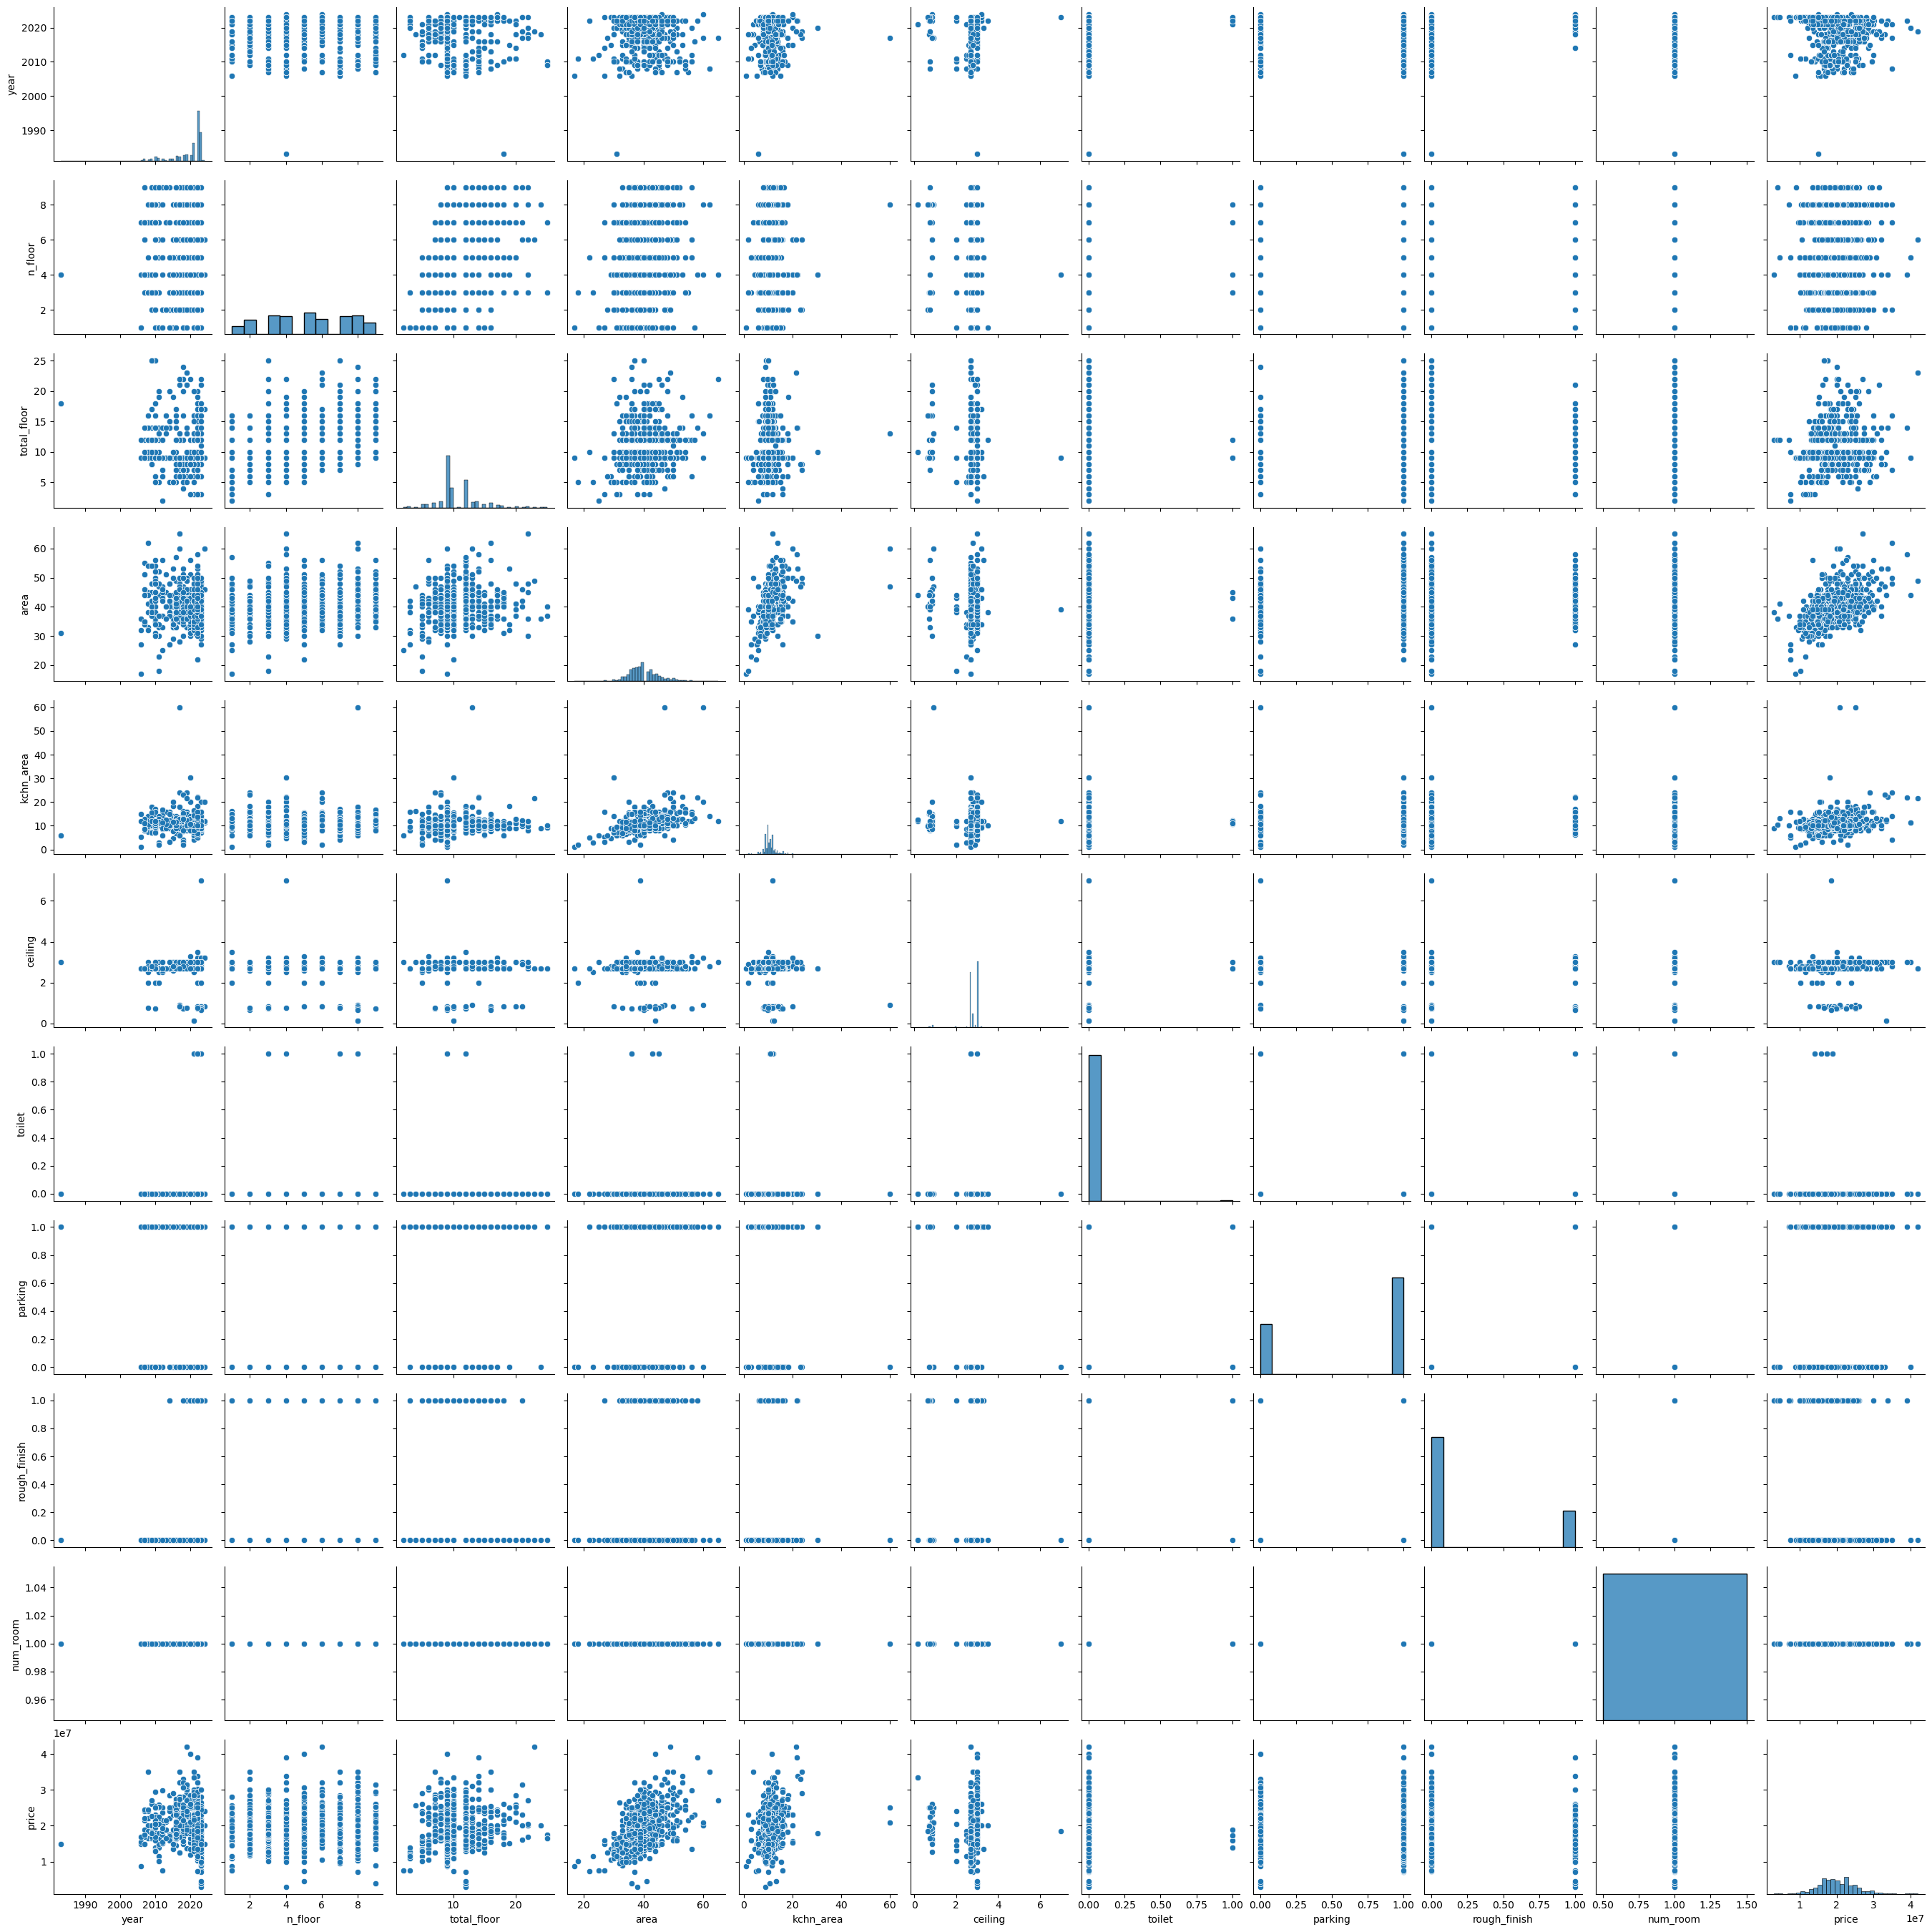

In [364]:
sns.pairplot(one_room_df)
plt.show()
plt.close()

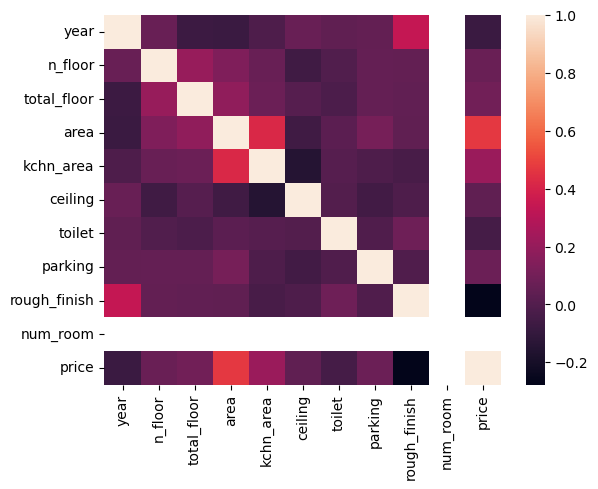

In [361]:
sns.heatmap(one_room_df.corr())
plt.show()
plt.close()

In [363]:
one_room_df.corr()

,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
year,1.000000,0.062987,-0.075190,-0.077434,-0.013418,0.065139,0.038426,0.047943,0.339667,NaN,-0.077402
n_floor,0.062987,1.000000,0.202349,0.134214,0.066498,-0.058569,-0.004374,0.054827,0.050281,NaN,0.068534
total_floor,-0.075190,0.202349,1.000000,0.182683,0.074318,0.008185,-0.022212,0.054149,0.047316,NaN,0.093831
area,-0.077434,0.134214,0.182683,1.000000,0.420671,-0.059430,0.026734,0.107995,0.040403,NaN,0.470198
kchn_area,-0.013418,0.066498,0.074318,0.420671,1.000000,-0.148045,0.010415,-0.013176,-0.036836,NaN,0.215426
ceiling,0.065139,-0.058569,0.008185,-0.059430,-0.148045,1.000000,-0.001634,-0.055293,-0.013778,NaN,0.038822
toilet,0.038426,-0.004374,-0.022212,0.026734,0.010415,-0.001634,1.000000,-0.008247,0.085808,NaN,-0.046433
parking,0.047943,0.054827,0.054149,0.107995,-0.013176,-0.055293,-0.008247,1.000000,-0.008477,NaN,0.076220
rough_finish,0.339667,0.050281,0.047316,0.040403,-0.036836,-0.013778,0.085808,-0.008477,1.000000,NaN,-0.276557
num_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
two_room_df.corr()

,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
year,1.000000,0.027397,-0.019787,-0.155090,-0.134836,0.170787,-0.038861,0.191242,0.348515,NaN,0.078428
n_floor,0.027397,1.000000,0.164098,-0.002910,0.023803,-0.047061,-0.020520,0.044964,0.041197,NaN,-0.001132
total_floor,-0.019787,0.164098,1.000000,-0.116314,0.082013,0.014864,-0.076158,-0.035163,0.045679,NaN,-0.096535
area,-0.155090,-0.002910,-0.116314,1.000000,0.245343,0.037389,0.094989,0.061755,-0.004387,NaN,0.292841
kchn_area,-0.134836,0.023803,0.082013,0.245343,1.000000,-0.047625,0.039322,-0.045902,-0.024354,NaN,0.145933
ceiling,0.170787,-0.047061,0.014864,0.037389,-0.047625,1.000000,-0.053496,0.008958,-0.014137,NaN,0.123622
toilet,-0.038861,-0.020520,-0.076158,0.094989,0.039322,-0.053496,1.000000,0.005694,0.049766,NaN,0.178766
parking,0.191242,0.044964,-0.035163,0.061755,-0.045902,0.008958,0.005694,1.000000,0.040043,NaN,0.169170
rough_finish,0.348515,0.041197,0.045679,-0.004387,-0.024354,-0.014137,0.049766,0.040043,1.000000,NaN,-0.216183
num_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [370]:
three_room_df.corr()

,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
year,1.000000,0.103709,-0.049583,0.206740,-0.074622,0.035266,-0.022822,0.145885,0.335910,NaN,0.026239
n_floor,0.103709,1.000000,0.155286,0.049374,0.011096,-0.027087,0.045917,0.038136,-0.004446,NaN,-0.062796
total_floor,-0.049583,0.155286,1.000000,-0.099681,0.000236,-0.074664,0.064919,-0.007692,-0.087634,NaN,-0.038418
area,0.206740,0.049374,-0.099681,1.000000,-0.403053,-0.139118,-0.037025,-0.120020,0.134630,NaN,-0.436963
kchn_area,-0.074622,0.011096,0.000236,-0.403053,1.000000,0.147487,0.021055,0.255433,-0.065125,NaN,0.401575
ceiling,0.035266,-0.027087,-0.074664,-0.139118,0.147487,1.000000,0.077587,0.093647,0.069374,NaN,0.248033
toilet,-0.022822,0.045917,0.064919,-0.037025,0.021055,0.077587,1.000000,0.111825,0.108110,NaN,0.151010
parking,0.145885,0.038136,-0.007692,-0.120020,0.255433,0.093647,0.111825,1.000000,0.055867,NaN,0.278031
rough_finish,0.335910,-0.004446,-0.087634,0.134630,-0.065125,0.069374,0.108110,0.055867,1.000000,NaN,-0.230091
num_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
